## Menggunakan Seluruh Library yang Dibutuhkan Dalam Akses

Library yang digunakan adalah sebagai berikut:

1. `cv2` (OpenCV): OpenCV (Open Source Computer Vision Library) adalah library yang berfokus pada pemrosesan citra dan penglihatan komputer. Library ini digunakan untuk membaca, memanipulasi, dan mengolah gambar atau video.

2. `numpy` (Numerical Python): NumPy adalah library yang digunakan untuk melakukan komputasi numerik dalam Python. NumPy menyediakan objek array multidimensi yang efisien, bersama dengan berbagai fungsi matematika untuk berbagai operasi numerik.

3. `matplotlib.pyplot`: Matplotlib adalah library visualisasi data dalam Python. Modul pyplot dari matplotlib digunakan untuk membuat grafik dan plot, termasuk histogram, grafik garis, scatter plot, dan sebagainya.

4. `os`: Modul os adalah modul bawaan Python yang menyediakan berbagai fungsi untuk berinteraksi dengan sistem operasi. Dalam konteks ini, modul os digunakan untuk berinteraksi dengan sistem operasi, seperti mendapatkan daftar file dalam sebuah direktori.

5. `random`: Modul random adalah modul bawaan Python yang digunakan untuk menghasilkan bilangan acak. Dalam konteks ini, modul random digunakan untuk melakukan pemilihan acak, seperti pemilihan acak data pelatihan atau pengacakan urutan.

6. `sklearn.model_selection.train_test_split`: Fungsi `train_test_split` dari modul `model_selection` dalam library scikit-learn (sklearn) digunakan untuk membagi dataset menjadi subset pelatihan dan subset pengujian. Ini sangat berguna dalam pemodelan dan evaluasi model machine learning.

7. `sklearn.preprocessing.StandardScaler`: `StandardScaler` adalah sebuah kelas dalam modul `preprocessing` dari scikit-learn yang digunakan untuk melakukan penskalaan fitur. Penskalaan fitur ini mengubah fitur menjadi memiliki rata-rata nol dan variansi satu, yang berguna dalam banyak algoritma machine learning.

8. `sklearn.neighbors.KNeighborsClassifier`: `KNeighborsClassifier` adalah sebuah kelas dalam modul `neighbors` dari scikit-learn yang mengimplementasikan algoritma k-Nearest Neighbors (k-NN) untuk klasifikasi. K-NN adalah metode klasifikasi di mana objek diklasifikasikan berdasarkan mayoritas label tetangga terdekatnya.

In [338]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

## Mengakses Seluruh Gambar Dalam Folder

Fungsi `importImage` memiliki satu parameter `path`, yang merupakan jalur direktori yang berisi file gambar. Fungsi ini bertujuan untuk mengimpor gambar-gambar dari direktori tersebut.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `importImage`:

1. Membuat sebuah list kosong dengan nama `images`. List ini akan digunakan untuk menyimpan gambar-gambar yang akan diimpor.

2. Menggunakan fungsi `os.listdir(path)`, yang akan mengembalikan daftar nama file dalam direktori yang diberikan (`path`). Hasilnya disimpan dalam variabel `file_names`.

3. Inisialisasi variabel `i` dengan nilai 0. Variabel ini akan digunakan untuk menghitung jumlah iterasi.

4. Memulai iterasi melalui setiap `file_name` dalam `file_names`.

5. Di dalam setiap iterasi, variabel `i` ditambah 1 menggunakan operator `+=` untuk menghitung jumlah iterasi.

6. Membentuk jalur lengkap ke file gambar dengan menggunakan `os.path.join(path, file_name)`. Hasilnya disimpan dalam variabel `file_path`.

7. Menggunakan fungsi `cv2.imread(file_path)`, yang digunakan untuk membaca gambar dari jalur file yang diberikan. Gambar yang dibaca disimpan dalam variabel `image`.

8. Menambahkan `image` ke dalam list `images` menggunakan metode `append`, sehingga gambar tersebut ditambahkan ke list.

9. Mengembalikan `images`, yaitu list yang berisi gambar-gambar yang telah diimpor dari direktori.

Dengan demikian, fungsi `importImage` akan mengembalikan list `images` yang berisi gambar-gambar yang diimpor dari direktori yang diberikan, dengan jumlah maksimum 144 gambar.

In [339]:
def importImage(path):
    images = []
    file_names = os.listdir(path)
    i = 0
    for file_name in file_names:
        i+=1
        file_path = os.path.join(path, file_name)
        image = cv2.imread(file_path)
        images.append(image)
        if i == 144 : break
    return images


In [340]:
imageRed = importImage("traffic_light_data/train/red")
imageYellow = importImage("traffic_light_data/train/yellow")
imageGreen = importImage("traffic_light_data/train/green")

## Fungsi Menampilkan Gambar

Fungsi `displayImage` memiliki satu parameter `images`, yang merupakan list gambar yang ingin ditampilkan. Fungsi ini bertujuan untuk menampilkan gambar-gambar tersebut dalam format grid menggunakan `matplotlib.pyplot`.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `displayImage`:

1. Mengatur ukuran gambar keseluruhan menggunakan `plt.figure(figsize=(10, 10))`. Dalam hal ini, ukuran gambar ditetapkan menjadi 10x10 inci.

2. Memulai iterasi melalui setiap indeks `i` dalam rentang panjang `len(images)`.

3. Di dalam setiap iterasi, menggunakan `plt.subplot(12, 12, i+1)` untuk membuat subplot dalam grid 12x12 dengan nomor subplot yang sesuai (i+1). Ini akan menentukan posisi subplot di dalam grid.

4. Mengubah format warna gambar dari BGR (format default dalam OpenCV) menjadi RGB menggunakan `cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)`. Hal ini diperlukan karena `plt.imshow()` mengharapkan format warna RGB untuk menampilkan gambar dengan benar.

5. Menggunakan `plt.imshow()` untuk menampilkan gambar yang telah dikonversi format warnanya.

6. Setelah selesai iterasi, menggunakan `plt.show()` untuk menampilkan grid gambar.

Dengan demikian, fungsi `displayImage` akan menampilkan gambar-gambar dalam format grid dengan ukuran 12x12. Gambar-gambar tersebut diambil dari list `images` yang diberikan sebagai argumen.

In [341]:
def displayImage(images):
    plt.figure(figsize=(5, 5))
    for i in range(2):
        plt.subplot(2, 2, i+1)
        bgr_image = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
        plt.imshow(bgr_image)
    plt.show()


## Mengubah Ukuran Gambar

Fungsi `displayImage` memiliki satu parameter `images`, yang merupakan list gambar yang ingin ditampilkan. Fungsi ini bertujuan untuk menampilkan gambar-gambar tersebut dalam format grid menggunakan `matplotlib.pyplot`.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `displayImage`:

1. Mengatur ukuran gambar keseluruhan menggunakan `plt.figure(figsize=(10, 10))`. Dalam hal ini, ukuran gambar ditetapkan menjadi 10x10 inci.

2. Memulai iterasi melalui setiap indeks `i` dalam rentang panjang `len(images)`.

3. Di dalam setiap iterasi, menggunakan `plt.subplot(12, 12, i+1)` untuk membuat subplot dalam grid 12x12 dengan nomor subplot yang sesuai (i+1). Ini akan menentukan posisi subplot di dalam grid.

4. Mengubah format warna gambar dari BGR (format default dalam OpenCV) menjadi RGB menggunakan `cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)`. Hal ini diperlukan karena `plt.imshow()` mengharapkan format warna RGB untuk menampilkan gambar dengan benar.

5. Menggunakan `plt.imshow()` untuk menampilkan gambar yang telah dikonversi format warnanya.

6. Setelah selesai iterasi, menggunakan `plt.show()` untuk menampilkan grid gambar.

Dengan demikian, fungsi `displayImage` akan menampilkan gambar-gambar dalam format grid dengan ukuran 12x12. Gambar-gambar tersebut diambil dari list `images` yang diberikan sebagai argumen.

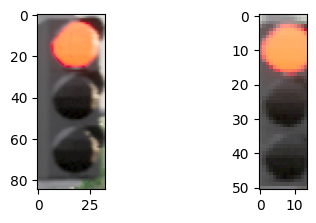

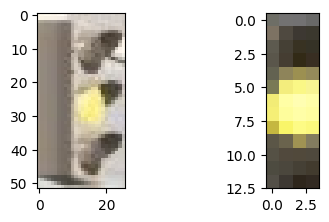

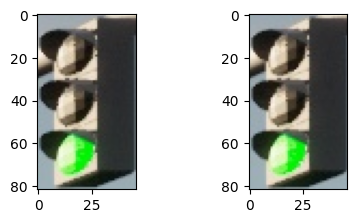

In [342]:
displayImage(imageRed)
displayImage(imageYellow)
displayImage(imageGreen)

In [343]:
def resizeImage(images):
    images_resize = []
    for image in images:
        image_resize = cv2.resize(image,(200,400))
        images_resize.append(image_resize)
    return images_resize

In [344]:
imageRed_resize = resizeImage(imageRed)
imageYellow_resize = resizeImage(imageYellow)
imageGreen_resize = resizeImage(imageGreen)

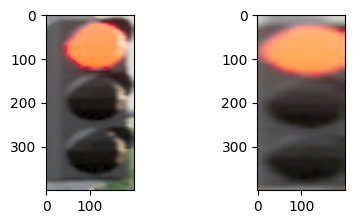

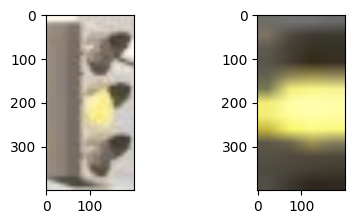

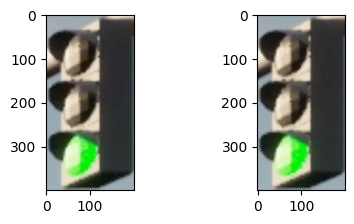

In [345]:
displayImage(imageRed_resize)
displayImage(imageYellow_resize)
displayImage(imageGreen_resize)

## Menghilangkan Noise Pada Gambar dengan Metode Gaussian

Fungsi `noiseRemoval` memiliki satu parameter `images`, yang merupakan list gambar yang ingin dihapuskan noise-nya. Fungsi ini bertujuan untuk menghapuskan noise pada gambar-gambar tersebut menggunakan Gaussian blur (pelarutan Gaussian).

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `noiseRemoval`:

1. Membuat list kosong dengan nama `images_noise`. List ini akan digunakan untuk menyimpan gambar-gambar yang telah dihapuskan noise-nya.

2. Memulai iterasi melalui setiap `image` dalam `images`.

3. Di dalam setiap iterasi, menggunakan `cv2.GaussianBlur(image, (5, 5), 0)` untuk menghapuskan noise pada `image` dengan menerapkan Gaussian blur. Fungsi ini menerima tiga argumen: gambar asli (`image`), ukuran kernel filter Gaussian (`(5, 5)` dalam contoh ini), dan deviasi standar (`0` dalam contoh ini).

4. Gambar yang telah dihapuskan noise-nya disimpan dalam variabel `image_noise`.

5. Menambahkan `image_noise` ke dalam list `images_noise` menggunakan metode `append`, sehingga gambar yang telah dihapuskan noise-nya ditambahkan ke list.

6. Setelah selesai iterasi, mengembalikan `images_noise`, yaitu list yang berisi gambar-gambar yang telah dihapuskan noise-nya.

Dengan demikian, fungsi `noiseRemoval` akan menghasilkan list `images_noise` yang berisi gambar-gambar yang telah dihapuskan noise-nya menggunakan Gaussian blur.

In [346]:
def noiseRemoval(images):
    images_noise = []
    for image in images:
        image_noise = cv2.GaussianBlur(image, (5, 5), 0)
        images_noise.append(image_noise)
    return images_noise

blurRed = noiseRemoval(imageRed_resize)
blurYellow = noiseRemoval(imageYellow_resize)
blurGreen = noiseRemoval(imageGreen_resize)

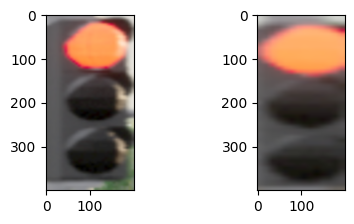

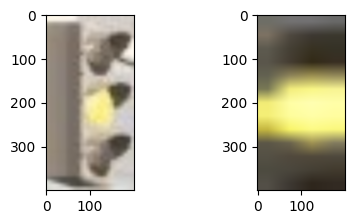

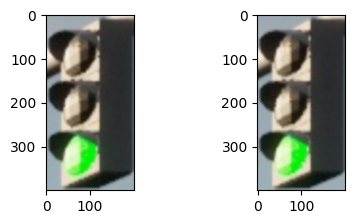

In [347]:
displayImage(blurRed)
displayImage(blurYellow)
displayImage(blurGreen)

## Merubah Gambar Agar Perbedaan Warna Terlihat Lebih Kontras

Fungsi `contrastEnhancement` memiliki satu parameter `images`, yang merupakan list gambar yang ingin ditingkatkan kontrasnya. Fungsi ini bertujuan untuk meningkatkan kontras pada gambar-gambar tersebut menggunakan konversi ke ruang warna LAB dan teknik CLAHE (Contrast Limited Adaptive Histogram Equalization).

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `contrastEnhancement`:

1. Membuat list kosong dengan nama `images_contrast`. List ini akan digunakan untuk menyimpan gambar-gambar yang telah ditingkatkan kontrasnya.

2. Memulai iterasi melalui setiap `image` dalam `images`.

3. Di dalam setiap iterasi, menggunakan `cv2.cvtColor(image, cv2.COLOR_BGR2LAB)` untuk mengubah format warna `image` dari BGR ke LAB. Ini dilakukan karena CLAHE akan diterapkan pada saluran luminositas (L) dalam ruang warna LAB.

4. Memisahkan saluran warna LAB menjadi saluran individu (L, A, B) menggunakan `cv2.split(image_lab)`. Hasilnya disimpan dalam variabel `lab_planes`, yang merupakan daftar saluran warna individu.

5. Membuat objek CLAHE dengan menggunakan `cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))`. CLAHE adalah metode yang digunakan untuk meningkatkan kontras lokal dalam gambar dengan memperhatikan histogram adaptif.

6. Mengambil saluran luminositas (L) dari `lab_planes` dan menerapkan CLAHE menggunakan `clahe.apply(lab_planes[0])`. Hasilnya ditimpa pada saluran luminositas (L) asli.

7. Menggabungkan kembali saluran warna LAB yang telah diperbarui menggunakan `cv2.merge(lab_planes)`, sehingga `image_lab` sekarang berisi gambar dengan saluran luminositas (L) yang ditingkatkan kontrasnya.

8. Mengonversi `image_lab` kembali ke format warna BGR menggunakan `cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)`. Hal ini dilakukan untuk mendapatkan gambar dengan kontras yang ditingkatkan dalam format BGR yang dapat ditampilkan dengan benar.

9. Menambahkan `image_contrast` ke dalam list `images_contrast` menggunakan metode `append`, sehingga gambar dengan kontras yang ditingkatkan ditambahkan ke list.

10. Setelah selesai iterasi, mengembalikan `images_contrast`, yaitu list yang berisi gambar-gambar dengan kontras yang telah ditingkatkan.

Dengan demikian, fungsi `contrastEnhancement` akan menghasilkan list `images_contrast` yang berisi gambar-gambar dengan kontras yang telah ditingkatkan menggunakan teknik CLAHE dalam ruang warna LAB.

In [348]:
def contrastEnhancement(images):
    images_contrast = []
    for image in images:
        b, g, r = cv2.split(image)
        print("Ini BGR[B]: ",b)
        image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
        lab_planes = cv2.split(image_lab)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(10, 10))
        lab_planes = list(lab_planes)
        lab_planes[0] = clahe.apply(lab_planes[0])
        print("Ini LAB[L]: ",lab_planes[0])
        lab_planes = tuple(lab_planes)
        image_lab = cv2.merge(lab_planes)
        image_contrast = cv2.cvtColor(image_lab, cv2.COLOR_LAB2BGR)
        images_contrast.append(image_contrast)
    return images_contrast

In [349]:
contrastRed = contrastEnhancement(blurRed)
contrastYellow = contrastEnhancement(blurYellow)
contrastGreen = contrastEnhancement(blurGreen)

Ini BGR[B]:  [[160 160 160 ... 221 221 221]
 [160 160 160 ... 221 221 221]
 [160 160 160 ... 221 221 221]
 ...
 [154 154 154 ... 100 100 100]
 [154 154 154 ...  99  99  99]
 [154 154 154 ...  99  99  99]]
Ini LAB[L]:  [[202 202 202 ... 255 255 255]
 [202 202 202 ... 255 255 255]
 [202 202 202 ... 255 255 255]
 ...
 [193 193 193 ... 178 178 178]
 [193 193 193 ... 175 175 175]
 [193 193 193 ... 175 175 175]]
Ini BGR[B]:  [[201 201 201 ... 210 210 210]
 [201 201 201 ... 210 210 210]
 [201 201 201 ... 210 210 210]
 ...
 [113 113 113 ...  95  95  95]
 [113 113 113 ...  95  95  95]
 [113 113 113 ...  95  95  95]]
Ini LAB[L]:  [[241 241 241 ... 244 244 244]
 [241 241 241 ... 244 244 244]
 [241 241 241 ... 244 244 244]
 ...
 [157 157 157 ... 179 179 179]
 [157 157 157 ... 179 179 179]
 [157 157 157 ... 179 179 179]]
Ini BGR[B]:  [[102 102 102 ...  66  66  66]
 [102 102 102 ...  66  66  66]
 [102 102 102 ...  66  66  66]
 ...
 [205 205 205 ... 121 121 121]
 [205 205 205 ... 121 121 121]
 [205 2

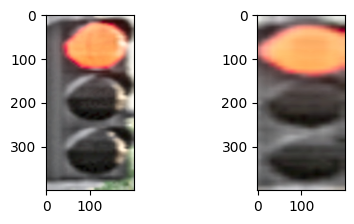

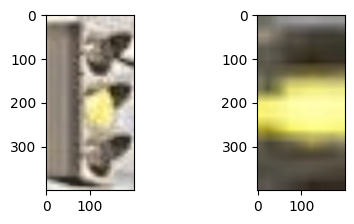

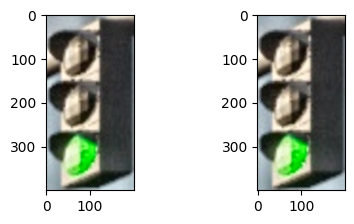

In [350]:
displayImage(contrastRed)
displayImage(contrastYellow)
displayImage(contrastGreen)

## Merubah Agar Memperjelas Warna Dengan Meningkatkan Saturnasi Warna

Fungsi `saturationEnhancement` memiliki satu parameter `images`, yang merupakan list gambar yang ingin ditingkatkan kejenuhan warnanya. Fungsi ini bertujuan untuk meningkatkan kejenuhan warna pada gambar-gambar tersebut menggunakan konversi ke ruang warna HSV.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `saturationEnhancement`:

1. Membuat list kosong dengan nama `images_saturation`. List ini akan digunakan untuk menyimpan gambar-gambar yang telah ditingkatkan kejenuhan warnanya.

2. Memulai iterasi melalui setiap `image` dalam `images`.

3. Di dalam setiap iterasi, menggunakan `cv2.cvtColor(image, cv2.COLOR_BGR2HSV)` untuk mengubah format warna `image` dari BGR ke HSV. Ini dilakukan karena kejenuhan (saturation) terkait dengan saluran S dalam ruang warna HSV.

4. Memisahkan saluran warna HSV menjadi saluran individu (H, S, V) menggunakan `cv2.split(image_hsv)`. Hasilnya disimpan dalam variabel `h`, `s`, dan `v`, yang masing-masing mewakili saluran hue, saluran kejenuhan (saturation), dan saluran nilai (value).

5. Menentukan faktor peningkatan kejenuhan yang diinginkan, dalam contoh ini adalah 1.5, menggunakan `saturation_factor`.

6. Mengalikan nilai saluran kejenuhan (S) dengan faktor peningkatan kejenuhan menggunakan `s = np.clip(s.astype(np.float32) * saturation_factor, 0, 255)`. Operasi ini meningkatkan kejenuhan warna dengan mengalikan setiap nilai saluran S dengan faktor peningkatan.

7. Memastikan bahwa nilai saluran kejenuhan (S) tetap dalam rentang 0-255 dengan menggunakan `s = np.clip(s, 0, 255).astype(np.uint8)`.

8. Menggabungkan kembali saluran warna HSV yang telah diperbarui menggunakan `cv2.merge([h, s, v])`, sehingga `image_hsv` sekarang berisi gambar dengan saluran kejenuhan (S) yang ditingkatkan.

9. Mengonversi `image_hsv` kembali ke format warna BGR menggunakan `cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)`. Hal ini dilakukan untuk mendapatkan gambar dengan kejenuhan warna yang ditingkatkan dalam format BGR yang dapat ditampilkan dengan benar.

10. Menambahkan `image_saturated` ke dalam list `images_saturation` menggunakan metode `append`, sehingga gambar dengan kejenuhan warna yang ditingkatkan ditambahkan ke list.

11. Setelah selesai iterasi, mengembalikan `images_saturation`, yaitu list yang berisi gambar-gambar dengan kejenuhan warna yang telah ditingkatkan.

Dengan demikian, fungsi `saturationEnhancement` akan menghasilkan list `images_saturation` yang berisi gambar-gambar dengan kejenuhan warna yang telah ditingkatkan menggunakan faktor peningkatan yang ditentukan.

In [351]:
def saturationEnhancement(images):
    images_saturation = []
    for image in images:
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        h, s, v = cv2.split(image_hsv)
        saturation_factor = 1.5
        s = np.clip(s.astype(np.float32) * saturation_factor, 0, 255)
        s = np.clip(s, 0, 255).astype(np.uint8)
        image_hsv = cv2.merge([h, s, v])
        image_saturated = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2BGR)
        images_saturation.append(image_saturated)
    return images_saturation


In [352]:
saturationRed = saturationEnhancement(contrastRed)
saturationYellow = saturationEnhancement(contrastYellow)
saturationGreen = saturationEnhancement(contrastGreen)

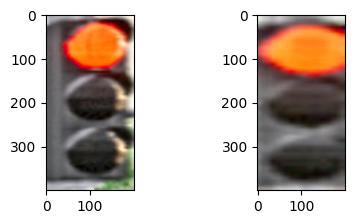

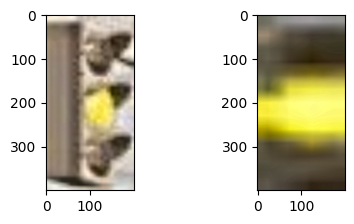

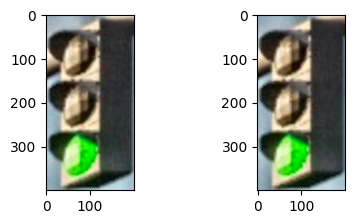

In [353]:
displayImage(saturationRed)
displayImage(saturationYellow)
displayImage(saturationGreen)

Fungsi `segmentColor` memiliki satu parameter `images`, yang merupakan list gambar yang ingin disegmentasi berdasarkan warna tertentu. Fungsi ini bertujuan untuk memisahkan objek dalam gambar-gambar tersebut berdasarkan warna menggunakan konversi ke ruang warna HSV dan teknik thresholding.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `segmentColor`:

1. Membuat list kosong dengan nama `images_segment`. List ini akan digunakan untuk menyimpan gambar-gambar yang telah disegmentasi berdasarkan warna.

2. Memulai iterasi melalui setiap `image` dalam `images`.

3. Di dalam setiap iterasi, menggunakan `cv2.cvtColor(image, cv2.COLOR_BGR2HSV)` untuk mengubah format warna `image` dari BGR ke HSV. Ini dilakukan karena segmentasi warna berdasarkan ruang warna HSV lebih efektif.

4. Menentukan range warna untuk objek yang ingin disegmentasi. Dalam contoh ini, ada tiga warna yang akan disegmentasi: merah (range: [0, 100, 20] hingga [179, 255, 255]), hijau (range: [50, 100, 100] hingga [70, 255, 255]), dan kuning (range: [20, 100, 100] hingga [30, 255, 255]). Range warna ini ditentukan dengan mengatur nilai lower dan upper untuk saluran hue (H), saluran kejenuhan (S), dan saluran nilai (V).

5. Menggunakan `cv2.inRange(image_hsv, lower_red, upper_red)` untuk membuat masker (mask) berdasarkan range warna merah. Ini akan menghasilkan gambar biner di mana piksel yang masuk dalam range warna akan bernilai 255 (putih), sedangkan piksel di luar range akan bernilai 0 (hitam). Langkah ini diulang untuk range warna hijau dan kuning.

6. Menggabungkan masker merah, hijau, dan kuning dengan melakukan operasi penjumlahan (`mask = mask_red + mask_green + mask_yellow`). Hal ini akan menghasilkan masker yang mencakup semua piksel yang masuk dalam range warna yang ditentukan.

7. Menggunakan `cv2.bitwise_and(image, image, mask=mask)` untuk menerapkan masker pada gambar asli. Operasi ini akan mempertahankan piksel dalam gambar yang sesuai dengan masker, sementara piksel di luar masker akan diatur menjadi 0. Hasilnya adalah gambar yang hanya menampilkan objek yang memiliki warna yang sesuai dengan range warna yang ditentukan.

8. Menambahkan `image_segment` ke dalam list `images_segment` menggunakan metode `append`, sehingga gambar yang telah disegmentasi berdasarkan warna ditambahkan ke list.

9. Setelah selesai iterasi, mengembalikan `images_segment`, yaitu list yang berisi gambar-gambar yang telah disegmentasi berdasarkan warna.

Dengan demikian, fungsi `segmentColor` akan menghasilkan list `images_segment` yang berisi gambar-gambar yang telah disegmentasi berdasarkan warna, dengan hanya menampilkan objek yang memiliki warna yang sesuai dengan range warna yang ditentukan.

In [354]:
def segmentColor(images):
    images_segment = []
    for image in images:
        image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower_red = np.array([0, 100, 100])
        upper_red = np.array([179, 255, 255])
        mask_red = cv2.inRange(image_hsv, lower_red, upper_red)
        lower_green = np.array([50, 100, 100])
        upper_green = np.array([70, 255, 255])
        mask_green = cv2.inRange(image_hsv, lower_green, upper_green)
        lower_yellow = np.array([20, 100, 100])
        upper_yellow = np.array([30, 255, 255])
        mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
        mask = mask_red + mask_green + mask_yellow
        image_segment = cv2.bitwise_and(image, image, mask=mask)
        images_segment.append(image_segment)
    return images_segment


In [355]:
segmentRed = segmentColor(saturationRed)
segmentYellow = segmentColor(saturationYellow)
segmentGreen = segmentColor(saturationGreen)

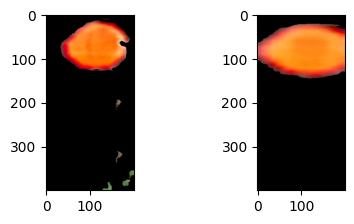

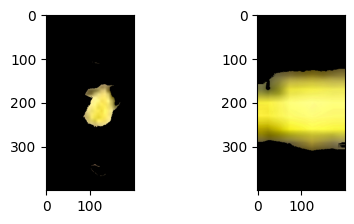

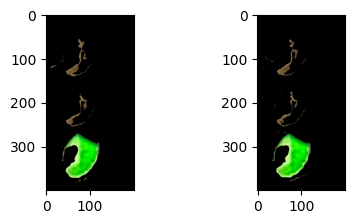

In [356]:
displayImage(segmentRed)
displayImage(segmentYellow)
displayImage(segmentGreen)

## Melakukan Erosi Pada Warna Agar Fokus Pada Noise Gambar Berkurang

Fungsi `erodeImage` memiliki satu parameter `images`, yang merupakan list gambar yang ingin diaplikasikan operasi erosi. Fungsi ini bertujuan untuk melakukan operasi erosi pada gambar-gambar tersebut menggunakan kernel yang ditentukan.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `erodeImage`:

1. Membuat list kosong dengan nama `images_erode`. List ini akan digunakan untuk menyimpan gambar-gambar yang telah mengalami operasi erosi.

2. Mendefinisikan kernel yang akan digunakan untuk operasi erosi dengan `kernel = np.ones((20, 20), np.uint8)`. Kernel ini berbentuk matriks persegi dengan ukuran 20x20 dan elemen-elemennya bernilai 1. Kernel ini akan digunakan untuk mengatur ukuran dan bentuk elemen struktural yang akan digunakan dalam operasi erosi.

3. Memulai iterasi melalui setiap `image` dalam `images`.

4. Di dalam setiap iterasi, menggunakan `cv2.erode(image, kernel, iterations=1)` untuk mengaplikasikan operasi erosi pada `image` dengan menggunakan kernel yang telah ditentukan. Nilai `iterations=1` menunjukkan bahwa operasi erosi akan dilakukan sekali.

5. Menambahkan `image_erode` ke dalam list `images_erode` menggunakan metode `append`, sehingga gambar yang telah mengalami operasi erosi ditambahkan ke list.

6. Setelah selesai iterasi, mengembalikan `images_erode`, yaitu list yang berisi gambar-gambar yang telah mengalami operasi erosi.

Dengan demikian, fungsi `erodeImage` akan menghasilkan list `images_erode` yang berisi gambar-gambar yang telah mengalami operasi erosi dengan menggunakan kernel yang ditentukan. Operasi erosi menghilangkan piksel di tepi objek dan memperkecil ukuran objek dalam gambar.

In [357]:
def erodeImage(images):
    images_erode = []
    kernel = np.ones((20, 20), np.uint8)
    for image in images:
        image_erode = cv2.erode(image, kernel, iterations=1)
        images_erode.append(image_erode)
    return images_erode

In [358]:
erodeRed = erodeImage(segmentRed)
erodeYellow = erodeImage(segmentYellow)
erodeGreen = erodeImage(segmentGreen)

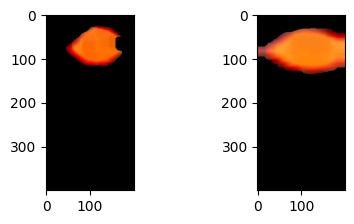

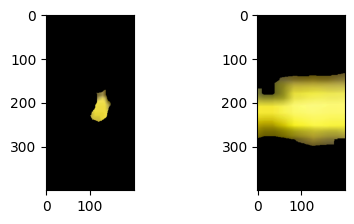

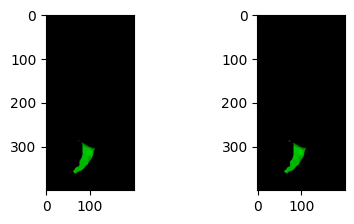

In [359]:
displayImage(erodeRed)
displayImage(erodeYellow)
displayImage(erodeGreen)

## Memperjelas Hanya Bagian Warna, dan Selain Warna Tersebut Akan Default Hitam

Fungsi `recognizeTrafficLightColor` memiliki tiga parameter: `red_images`, `yellow_images`, dan `green_images`. Fungsi ini bertujuan untuk mengenali warna lampu lalu lintas (merah, kuning, atau hijau) berdasarkan gambar-gambar yang diberikan. Fungsi ini menggunakan algoritma K-Nearest Neighbors (K-NN) untuk melakukan klasifikasi warna.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `recognizeTrafficLightColor`:

1. Membuat list `labels` yang berisi label kelas untuk masing-masing warna: 0 untuk merah, 1 untuk kuning, dan 2 untuk hijau.

2. Membuat list kosong `features` yang akan digunakan untuk menyimpan fitur-fitur gambar, dan `target_labels` yang akan digunakan untuk menyimpan label kelas yang sesuai dengan setiap fitur.

3. Melakukan iterasi melalui setiap `image` dalam `red_images`. Pada setiap iterasi, menghitung rata-rata warna dari `image` menggunakan `np.mean(image, axis=(0, 1))`. Hasilnya adalah vektor rata-rata warna dari gambar tersebut.

4. Menambahkan vektor rata-rata warna (`avg_color`) ke dalam list `features`, dan menambahkan label kelas yang sesuai (`labels[0]` untuk merah) ke dalam list `target_labels`.

5. Langkah 3 dan 4 diulang untuk `yellow_images` dan `green_images`, dengan label kelas yang sesuai dan hasilnya ditambahkan ke dalam list `features` dan `target_labels`.

6. Memisahkan data fitur (`features`) dan label (`target_labels`) menjadi data latih (`X_train` dan `y_train`) dan data uji (`X_test` dan `y_test`) menggunakan `train_test_split`. Dalam contoh ini, data uji akan memiliki ukuran 20% dari total data.

7. Melakukan penskalaan data fitur menggunakan `StandardScaler()`. Data latih (`X_train`) akan di-fit dan di-transformasi menggunakan `fit_transform`, sedangkan data uji (`X_test`) hanya akan di-transformasi menggunakan `transform`. Hal ini dilakukan untuk memastikan data fitur memiliki skala yang seragam.

8. Membuat objek `model` dengan menggunakan `KNeighborsClassifier` dengan jumlah tetangga (n_neighbors) sebanyak 3. Model ini akan digunakan untuk melakukan klasifikasi berdasarkan data latih (`X_train` dan `y_train`).

9. Melakukan pelatihan model dengan memanggil `fit(X_train, y_train)` pada objek `model`.

10. Mengembalikan objek `model` dan objek `scaler` sebagai hasil fungsi.

Dengan demikian, fungsi `recognizeTrafficLightColor` akan mengembalikan model klasifikasi yang telah dilatih dan objek scaler yang digunakan untuk penskalaan data. Model ini dapat digunakan untuk memprediksi warna lampu lalu lintas berdasarkan fitur rata-rata warna dari gambar-gambar yang diberikan.

In [360]:
def recognizeTrafficLightColor(red_images, yellow_images, green_images):
    labels = [0, 1, 2]

    features = []
    target_labels = []

    for image in red_images:
        avg_color = np.mean(image, axis=(0, 1))
        print(avg_color)
        features.append(avg_color)
        target_labels.append(labels[0])

    for image in yellow_images:
        avg_color = np.mean(image, axis=(0, 1))
        features.append(avg_color)
        target_labels.append(labels[1])

    for image in green_images:
        avg_color = np.mean(image, axis=(0, 1))
        features.append(avg_color)
        target_labels.append(labels[2])

    X_train, X_test, y_train, y_test = train_test_split(features, target_labels, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    model = KNeighborsClassifier(n_neighbors=3)
    model.fit(X_train, y_train)

    return model, scaler

In [361]:
model, scaler = recognizeTrafficLightColor(erodeRed, erodeYellow, erodeGreen)    

[ 0.7900875  8.31115   23.549775 ]
[ 5.510775  20.4630125 45.33355  ]
[ 4.199225  17.0188625 33.9372625]
[ 4.339875  23.7035375 48.7282375]
[ 3.217775  18.4121125 37.3627875]
[ 3.217775  18.4121125 37.3627875]
[ 5.0691375 24.6413375 49.95095  ]
[ 2.646925  13.4261875 29.6960875]
[ 2.5590375 12.8530875 29.06745  ]
[ 2.6806875 13.8519625 29.144825 ]
[ 1.9337375  9.89855   23.7935375]
[ 1.9337375  9.89855   23.7935375]
[ 4.6566375 17.551375  40.6513125]
[ 2.6585875 13.0051875 29.9782875]
[ 1.9721125 12.3017    30.11355  ]
[ 1.9721125 12.3017    30.11355  ]
[ 1.350575   8.3821875 21.4173   ]
[ 1.545125  9.0571   22.80445 ]
[ 1.4687125  9.4967    23.1656875]
[ 0.9934375  7.7011375 20.2456625]
[ 1.2047375  7.9756125 20.655075 ]
[ 0.6436875  5.491475  14.901875 ]
[ 0.496325   4.9621875 14.222075 ]
[ 2.894275  13.7977875 34.8271125]
[ 0.496325   4.9621875 14.222075 ]
[ 0.2936125  3.7913375 11.8409125]
[ 0.2723375  4.22245   13.2178   ]
[ 0.2536125  4.1488625 13.0317625]
[ 0.2617125  3.6244125 

Fungsi `allProcess` memiliki satu parameter `images`, yang merupakan list gambar yang ingin diproses melalui serangkaian tahapan pemrosesan. Fungsi ini bertujuan untuk menjalankan seluruh proses yang telah dijelaskan sebelumnya, yaitu resizing gambar, penghilangan noise, peningkatan kontras, peningkatan saturasi, segmentasi warna, dan erosi gambar.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `allProcess`:

1. Memanggil fungsi `resizeImage(images)` untuk meresize gambar-gambar dalam `images`. Hasilnya disimpan dalam variabel `images_resize`.

2. Memanggil fungsi `noiseRemoval(images_resize)` untuk menghilangkan noise pada gambar-gambar dalam `images_resize`. Hasilnya disimpan dalam variabel `images_noise`.

3. Memanggil fungsi `contrastEnhancement(images_noise)` untuk meningkatkan kontras pada gambar-gambar dalam `images_noise`. Hasilnya disimpan dalam variabel `images_contrast`.

4. Memanggil fungsi `saturationEnhancement(images_contrast)` untuk meningkatkan saturasi pada gambar-gambar dalam `images_contrast`. Hasilnya disimpan dalam variabel `images_saturation`.

5. Memanggil fungsi `segmentColor(images_saturation)` untuk melakukan segmentasi warna pada gambar-gambar dalam `images_saturation`. Hasilnya disimpan dalam variabel `images_segment`.

6. Memanggil fungsi `erodeImage(images_segment)` untuk melakukan erosi pada gambar-gambar dalam `images_segment`. Hasilnya disimpan dalam variabel `images_erode`.

7. Mengembalikan `images_erode`, yaitu list gambar-gambar yang telah melewati seluruh proses pemrosesan.

Dengan demikian, fungsi `allProcess` akan menghasilkan list `images_erode` yang berisi gambar-gambar yang telah diproses melalui serangkaian tahapan pemrosesan, yaitu resizing, penghilangan noise, peningkatan kontras, peningkatan saturasi, segmentasi warna, dan erosi gambar.

In [362]:
def allProcess(images):
    images_resize = resizeImage(images)
    images_noise = noiseRemoval(images_resize)
    images_contrast = contrastEnhancement(images_noise)
    images_saturation = saturationEnhancement(images_contrast)
    images_segment = segmentColor(images_saturation)
    images_erode = erodeImage(images_segment)
    return images_erode

Fungsi `predictRandomTrafficLightColor` memiliki tiga parameter: `images`, `model`, dan `scaler`. Fungsi ini bertujuan untuk memprediksi warna lampu lalu lintas (merah, kuning, atau hijau) dari gambar-gambar yang diberikan menggunakan model klasifikasi yang telah dilatih sebelumnya.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `predictRandomTrafficLightColor`:

1. Memanggil fungsi `allProcess(images)` untuk melakukan seluruh proses pemrosesan pada gambar-gambar dalam `images`. Hasilnya disimpan kembali dalam variabel `images`.

2. Membuat list kosong `predict` yang akan digunakan untuk menyimpan prediksi warna lampu lalu lintas.

3. Melakukan iterasi melalui setiap `image` dalam `images`.

4. Di dalam setiap iterasi, menghitung rata-rata warna dari `image` menggunakan `np.mean(image, axis=(0, 1))`. Hasilnya adalah vektor rata-rata warna dari gambar tersebut.

5. Melakukan penskalaan warna rata-rata (`avg_color`) menggunakan `scaler.transform([avg_color])`. Hal ini dilakukan untuk memastikan data warna memiliki skala yang seragam seperti saat melatih model.

6. Menggunakan model klasifikasi (`model`) untuk memprediksi label kelas berdasarkan warna rata-rata yang telah diubah skala (`scaled_color`). Hasil prediksi disimpan dalam variabel `predicted_label`.

7. Berdasarkan nilai `predicted_label`, menentukan warna yang diprediksi dan menambahkannya ke dalam list `predict`. Jika `predicted_label` adalah 0, menambahkan "red" ke dalam `predict`. Jika `predicted_label` adalah 1, menambahkan "yellow". Jika `predicted_label` adalah 2, menambahkan "green". Jika `predicted_label` tidak sesuai dengan ketiga nilai tersebut, menambahkan "unknown".

8. Setelah selesai iterasi, mengembalikan `predict`, yaitu list yang berisi prediksi warna lampu lalu lintas untuk setiap gambar dalam `images`.

Dengan demikian, fungsi `predictRandomTrafficLightColor` akan mengembalikan list `predict` yang berisi prediksi warna lampu lalu lintas (merah, kuning, hijau, atau unknown) untuk setiap gambar dalam `images` berdasarkan model klasifikasi yang telah dilatih dan objek scaler yang digunakan untuk penskalaan data.

In [363]:
def predictRandomTrafficLightColor(images, model, scaler):
    images = allProcess(images)
    predict = []
    for image in images:
        avg_color = np.mean(image, axis=(0, 1))
        scaled_color = scaler.transform([avg_color])
        predicted_label = model.predict(scaled_color)
        if predicted_label[0] == 0:
            predict.append("red")
        elif predicted_label[0] == 1:
            predict.append("yellow")
        elif predicted_label[0] == 2:
            predict.append("green")
        else:
            predict.append("unknown")
    return predict

## Memanggil Data Random

Fungsi `randImage` tidak menggunakan parameter. Fungsi ini bertujuan untuk menghasilkan gambar-gambar acak dari setiap kategori warna lampu lalu lintas (merah, kuning, hijau) beserta label warna yang sebenarnya.

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `randImage`:

1. Membuat list `folder` yang berisi kategori warna lampu lalu lintas, yaitu "red", "yellow", dan "green".

2. Membuat list kosong `real_color` yang akan digunakan untuk menyimpan label warna yang sebenarnya dari setiap gambar.

3. Membuat list kosong `random_images` yang akan digunakan untuk menyimpan gambar-gambar acak.

4. Melakukan iterasi sebanyak 144 kali (sesuai dengan jumlah gambar yang ingin dihasilkan).

5. Di dalam setiap iterasi, secara acak memilih salah satu kategori warna dari `folder` menggunakan `random.choice(folder)`. Hasilnya disimpan dalam variabel `folder_rand`.

6. Menambahkan `folder_rand` ke dalam list `real_color`, yaitu sebagai label warna yang sebenarnya dari gambar yang akan dipilih.

7. Membentuk path ke direktori gambar acak dengan menggunakan `folder_rand` dan direktori awal "traffic_light_data/train/". Path ini akan digunakan untuk memilih gambar acak dari kategori warna yang telah ditentukan.

8. Secara acak memilih salah satu gambar dari direktori yang sesuai dengan `folder_rand` menggunakan `random.choice(os.listdir(path))`. Hasilnya adalah nama file gambar acak.

9. Menggabungkan path direktori dengan nama file gambar acak menggunakan `os.path.join(path, random_image)`. Hasilnya adalah path lengkap ke gambar acak.

10. Menggunakan `cv2.imread(random_image_path)` untuk membaca gambar acak dari path yang telah dibentuk. Hasilnya disimpan dalam variabel `random_image`.

11. Menambahkan `random_image` ke dalam list `random_images`.

12. Setelah selesai iterasi, mengembalikan `random_images` dan `real_color`, yaitu list gambar-gambar acak beserta label warna yang sebenarnya.

Dengan demikian, fungsi `randImage` akan mengembalikan tuple yang terdiri dari list `random_images` yang berisi gambar-gambar acak dan list `real_color` yang berisi label warna yang sebenarnya untuk setiap gambar.

In [364]:
def randImage():
    folder = ["red", "yellow", "green"]
    real_color = []
    random_images = []
    for i in range(144):    
        folder_rand = random.choice(folder)
        real_color.append(folder_rand)
        path = f"traffic_light_data/train/{folder_rand}/"
        random_image = random.choice(os.listdir(path))
        random_image_path = os.path.join(path, random_image)
        random_image = cv2.imread(random_image_path)
        random_images.append(random_image)
    return random_images, real_color

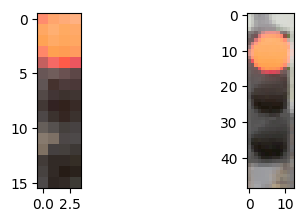

In [365]:
random_images,real_color = randImage()
displayImage(random_images)

## Mengidentifikasi Berdasarkan Data Random, Dengan Hasil Prediksi Warna Gambar Tersebut

In [366]:
predicted_color = predictRandomTrafficLightColor(random_images, model, scaler)
print("real:   ",real_color)
print("predict:",predicted_color)

Ini BGR[B]:  [[110 110 110 ... 130 130 130]
 [110 110 110 ... 130 130 130]
 [110 110 110 ... 130 130 130]
 ...
 [ 73  73  73 ...  53  53  53]
 [ 73  73  73 ...  53  53  53]
 [ 73  73  73 ...  53  53  53]]
Ini LAB[L]:  [[174 174 174 ... 207 207 207]
 [174 174 174 ... 207 207 207]
 [174 174 174 ... 207 207 207]
 ...
 [ 95  95  95 ... 107 107 107]
 [ 95  95  95 ... 107 107 107]
 [ 95  95  95 ... 107 107 107]]
Ini BGR[B]:  [[209 209 209 ... 211 211 211]
 [209 209 209 ... 211 211 211]
 [209 209 209 ... 211 211 211]
 ...
 [146 146 146 ... 122 122 122]
 [146 146 146 ... 122 122 122]
 [146 146 146 ... 122 122 122]]
Ini LAB[L]:  [[224 224 224 ... 231 231 231]
 [224 224 224 ... 231 231 231]
 [224 224 224 ... 231 231 231]
 ...
 [184 184 184 ... 131 131 131]
 [184 184 184 ... 131 131 131]
 [184 184 184 ... 131 131 131]]
Ini BGR[B]:  [[ 40  40  40 ... 185 184 184]
 [ 40  40  40 ... 184 184 184]
 [ 40  40  40 ... 183 183 183]
 ...
 [ 16  16  16 ...   5   5   5]
 [ 16  16  16 ...   5   5   5]
 [ 16  

## Membandingkan Hasil Data Untuk Menjadikan Akurasi

Fungsi `calculateAccuracy` memiliki dua parameter: `real_color` dan `predicted_color`. Fungsi ini bertujuan untuk menghitung akurasi prediksi warna lampu lalu lintas dengan membandingkan label warna yang sebenarnya (`real_color`) dengan prediksi warna yang diberikan (`predicted_color`).

Berikut adalah penjelasan langkah-langkah yang dilakukan oleh fungsi `calculateAccuracy`:

1. Membuat variabel `correct` dengan nilai awal 0. Variabel ini akan digunakan untuk menghitung jumlah prediksi yang benar.

2. Melakukan iterasi sebanyak jumlah elemen dalam `real_color` (atau `predicted_color`, karena keduanya memiliki panjang yang sama).

3. Di dalam setiap iterasi, membandingkan apakah `real_color[i]` (label warna yang sebenarnya) sama dengan `predicted_color[i]` (prediksi warna yang diberikan). Jika sama, maka `correct` ditambahkan 1.

4. Menghitung akurasi dengan membagi jumlah prediksi yang benar (`correct`) dengan jumlah total data (`len(real_color)`).

5. Mengembalikan nilai akurasi.

Dengan demikian, fungsi `calculateAccuracy` akan mengembalikan nilai akurasi dari prediksi warna lampu lalu lintas, dihitung berdasarkan perbandingan antara label warna yang sebenarnya (`real_color`) dengan prediksi warna yang diberikan (`predicted_color`).

In [367]:
def calculateAccuracy(real_color, predicted_color):
    correct = 0
    for i in range(len(real_color)):
        if real_color[i] == predicted_color[i]:
            correct += 1
    accuracy = correct / len(real_color)
    return accuracy

In [368]:
accuracy = calculateAccuracy(real_color, predicted_color)
print("Accuracy:",accuracy)

Accuracy: 0.9791666666666666
